# Building our first neural network
## Using Tensorflow 2.0

In [27]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

### Creating data

In [3]:
def fn(x, A=1, B=1, C=0., D=0.):
    pi2 = 6.2831 # 2*pi
    return A*tf.math.sin(pi2/B*(x+C))+D

In [4]:
x = np.random.uniform(size=[20, 100])
x = np.sort(x, axis=1)

y = fn(x)

2022-07-01 12:45:47.562956: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-01 12:45:47.562982: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-01 12:45:47.563010: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (appa): /proc/driver/nvidia/version does not exist
2022-07-01 12:45:47.563281: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


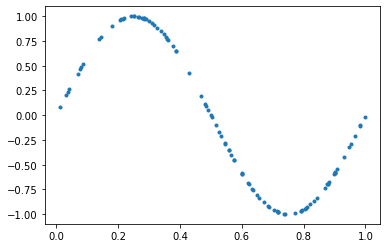

In [5]:
plt.plot(x[0], y[0], '.')
plt.show()

### Building the hidden layer

In [6]:
from tensorflow.keras.layers import Layer

In [7]:
class HiddenLayer(Layer):
    def __init__(self, num_outputs):
        super(HiddenLayer, self).__init__()
        self.num_outputs = num_outputs

    def build(self, input_shape):
        
        w_value = tf.random.normal(shape=[int(input_shape[-1]),
                                         self.num_outputs])
        bias_value = tf.zeros([self.num_outputs])
        
        self.W = tf.Variable(initial_value=w_value)
        self.b = tf.Variable(initial_value=bias_value)

    def call(self, inputs):
        product = tf.matmul(inputs, self.W)
        return product +self.b

### Building the model architecture

In [8]:
from tensorflow.keras import Model, Input

In [9]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.h1 = HiddenLayer(num_outputs=128)
        self.h2 = HiddenLayer(num_outputs=128)
        self.out = HiddenLayer(num_outputs=1)
    def call(self, x):
        x = self.h1(x)
        x = self.h2(x)
        x = self.out(x)
        return x

### Creating the model

In [10]:
inp = Input(shape=(100), batch_size=None,
           dtype=tf.float32)

In [11]:
model = MyModel()
model(x)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (HiddenLayer)  multiple                  12928     
                                                                 
 hidden_layer_1 (HiddenLayer  multiple                 16512     
 )                                                               
                                                                 
 hidden_layer_2 (HiddenLayer  multiple                 129       
 )                                                               
                                                                 
Total params: 29,569
Trainable params: 29,569
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

Here we define our `loss`, performance `metric`, and `optimizer` algorithm.

In [12]:
model.compile(loss='mse', optimizer='adam', metrics='mse')

Alternatively, you can import the objects from Tensorflow

In [13]:
loss_obj = tf.keras.losses.MeanSquaredError() 
opt_obj = tf.keras.optimizers.Adam()
metric = tf.keras.metrics.MeanAbsoluteError()

In [14]:
model.compile(loss=loss_obj, 
              optimizer=opt_obj, 
              metrics=metric)

### Training

For training we can use the `.fit()` method that includes all the necessary for the optimization of parameters

In [15]:
history = model.fit(x, y, 
                    epochs=200, 
                    validation_split=0.3)

Epoch 1/200
1/1 [==============================] - 0s 389ms/step - loss: 331882.9062 - mean_absolute_error: 570.6573 - val_loss: 212652.2969 - val_mean_absolute_error: 456.4955
Epoch 2/200
1/1 [==============================] - 0s 21ms/step - loss: 209579.5312 - mean_absolute_error: 451.5852 - val_loss: 117984.7266 - val_mean_absolute_error: 337.8112
Epoch 3/200
1/1 [==============================] - 0s 24ms/step - loss: 116741.1250 - mean_absolute_error: 334.1211 - val_loss: 52965.3633 - val_mean_absolute_error: 222.4026
Epoch 4/200
1/1 [==============================] - 0s 24ms/step - loss: 52956.3320 - mean_absolute_error: 219.8930 - val_loss: 15867.6982 - val_mean_absolute_error: 112.6733
Epoch 5/200
1/1 [==============================] - 0s 21ms/step - loss: 16540.0352 - mean_absolute_error: 117.2742 - val_loss: 3025.9636 - val_mean_absolute_error: 45.7059
Epoch 6/200
1/1 [==============================] - 0s 24ms/step - loss: 3903.1775 - mean_absolute_error: 51.1063 - val_loss: 8

1/1 [==============================] - 0s 19ms/step - loss: 4414.1079 - mean_absolute_error: 55.5591 - val_loss: 4035.5557 - val_mean_absolute_error: 52.9658
Epoch 49/200
1/1 [==============================] - 0s 21ms/step - loss: 4400.5049 - mean_absolute_error: 55.5022 - val_loss: 3834.5342 - val_mean_absolute_error: 51.4445
Epoch 50/200
1/1 [==============================] - 0s 19ms/step - loss: 4201.4580 - mean_absolute_error: 53.9290 - val_loss: 3498.8005 - val_mean_absolute_error: 49.6463
Epoch 51/200
1/1 [==============================] - 0s 20ms/step - loss: 3883.3418 - mean_absolute_error: 51.5832 - val_loss: 3122.9685 - val_mean_absolute_error: 47.2402
Epoch 52/200
1/1 [==============================] - 0s 19ms/step - loss: 3536.9832 - mean_absolute_error: 48.5274 - val_loss: 2797.1023 - val_mean_absolute_error: 44.4544
Epoch 53/200
1/1 [==============================] - 0s 20ms/step - loss: 3247.8948 - mean_absolute_error: 45.9561 - val_loss: 2582.1309 - val_mean_absolute_er

Epoch 96/200
1/1 [==============================] - 0s 19ms/step - loss: 2317.5876 - mean_absolute_error: 37.4496 - val_loss: 2154.1287 - val_mean_absolute_error: 37.2261
Epoch 97/200
1/1 [==============================] - 0s 21ms/step - loss: 2303.4324 - mean_absolute_error: 37.3318 - val_loss: 2139.3889 - val_mean_absolute_error: 36.9489
Epoch 98/200
1/1 [==============================] - 0s 19ms/step - loss: 2289.7908 - mean_absolute_error: 37.2440 - val_loss: 2128.0798 - val_mean_absolute_error: 36.7814
Epoch 99/200
1/1 [==============================] - 0s 19ms/step - loss: 2275.3618 - mean_absolute_error: 37.1459 - val_loss: 2119.8396 - val_mean_absolute_error: 36.7274
Epoch 100/200
1/1 [==============================] - 0s 20ms/step - loss: 2259.4592 - mean_absolute_error: 37.0119 - val_loss: 2114.5181 - val_mean_absolute_error: 36.7778
Epoch 101/200
1/1 [==============================] - 0s 21ms/step - loss: 2242.1326 - mean_absolute_error: 36.8448 - val_loss: 2112.1316 - val_m

Epoch 144/200
1/1 [==============================] - 0s 19ms/step - loss: 1627.7396 - mean_absolute_error: 30.9998 - val_loss: 1860.3363 - val_mean_absolute_error: 35.7857
Epoch 145/200
1/1 [==============================] - 0s 19ms/step - loss: 1615.5863 - mean_absolute_error: 30.8898 - val_loss: 1853.3861 - val_mean_absolute_error: 35.7223
Epoch 146/200
1/1 [==============================] - 0s 20ms/step - loss: 1603.5137 - mean_absolute_error: 30.7791 - val_loss: 1845.9000 - val_mean_absolute_error: 35.6506
Epoch 147/200
1/1 [==============================] - 0s 19ms/step - loss: 1591.5271 - mean_absolute_error: 30.6678 - val_loss: 1838.1742 - val_mean_absolute_error: 35.5751
Epoch 148/200
1/1 [==============================] - 0s 19ms/step - loss: 1579.6523 - mean_absolute_error: 30.5565 - val_loss: 1830.5248 - val_mean_absolute_error: 35.5001
Epoch 149/200
1/1 [==============================] - 0s 20ms/step - loss: 1567.8741 - mean_absolute_error: 30.4453 - val_loss: 1823.1787 - v

1/1 [==============================] - 0s 19ms/step - loss: 1155.2871 - mean_absolute_error: 26.1256 - val_loss: 1617.7339 - val_mean_absolute_error: 33.5378
Epoch 192/200
1/1 [==============================] - 0s 20ms/step - loss: 1147.3046 - mean_absolute_error: 26.0295 - val_loss: 1613.4010 - val_mean_absolute_error: 33.4917
Epoch 193/200
1/1 [==============================] - 0s 20ms/step - loss: 1139.3845 - mean_absolute_error: 25.9335 - val_loss: 1608.9830 - val_mean_absolute_error: 33.4444
Epoch 194/200
1/1 [==============================] - 0s 20ms/step - loss: 1131.5596 - mean_absolute_error: 25.8379 - val_loss: 1604.5267 - val_mean_absolute_error: 33.3963
Epoch 195/200
1/1 [==============================] - 0s 20ms/step - loss: 1123.8068 - mean_absolute_error: 25.7425 - val_loss: 1600.0421 - val_mean_absolute_error: 33.3476
Epoch 196/200
1/1 [==============================] - 0s 21ms/step - loss: 1116.1272 - mean_absolute_error: 25.6473 - val_loss: 1595.5576 - val_mean_absolu

### Visualizing training (off-line)

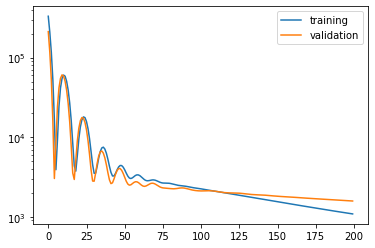

In [16]:
plt.figure()
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.yscale('log')
plt.show()

### Callbacks

In [17]:
from tensorflow.keras.callbacks import EarlyStopping 

In [23]:
es_cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        mode='min',
        restore_best_weights=True
    )

In [24]:
model = MyModel()
model.compile(loss='mse', optimizer='adam', metrics='mse')

In [25]:
hist = model.fit(x, y, epochs=10000, 
          callbacks=[es_cb], 
          validation_split=0.3)

Epoch 1/10000
1/1 [==============================] - 0s 303ms/step - loss: 20179.2754 - mse: 20179.2754 - val_loss: 1604.1205 - val_mse: 1604.1205
Epoch 2/10000
1/1 [==============================] - 0s 23ms/step - loss: 1823.6150 - mse: 1823.6150 - val_loss: 7663.0044 - val_mse: 7663.0044
Epoch 3/10000
1/1 [==============================] - 0s 19ms/step - loss: 7297.0596 - mse: 7297.0596 - val_loss: 12077.1914 - val_mse: 12077.1914
Epoch 4/10000
1/1 [==============================] - 0s 20ms/step - loss: 11465.2715 - mse: 11465.2715 - val_loss: 8122.3472 - val_mse: 8122.3472
Epoch 5/10000
1/1 [==============================] - 0s 20ms/step - loss: 7686.7095 - mse: 7686.7095 - val_loss: 2959.6418 - val_mse: 2959.6418
Epoch 6/10000
1/1 [==============================] - 0s 21ms/step - loss: 2854.2839 - mse: 2854.2839 - val_loss: 1466.6553 - val_mse: 1466.6553
Epoch 7/10000
1/1 [==============================] - 0s 20ms/step - loss: 1651.7687 - mse: 1651.7687 - val_loss: 3504.2693 - val_

Epoch 58/10000
1/1 [==============================] - 0s 19ms/step - loss: 708.0214 - mse: 708.0214 - val_loss: 937.0732 - val_mse: 937.0732
Epoch 59/10000
1/1 [==============================] - 0s 17ms/step - loss: 702.3278 - mse: 702.3278 - val_loss: 985.0645 - val_mse: 985.0645
Epoch 60/10000
1/1 [==============================] - 0s 19ms/step - loss: 706.6264 - mse: 706.6264 - val_loss: 985.3780 - val_mse: 985.3780
Epoch 61/10000
1/1 [==============================] - 0s 19ms/step - loss: 698.0507 - mse: 698.0507 - val_loss: 935.6921 - val_mse: 935.6921
Epoch 62/10000
1/1 [==============================] - 0s 19ms/step - loss: 674.0912 - mse: 674.0912 - val_loss: 866.9177 - val_mse: 866.9177
Epoch 63/10000
1/1 [==============================] - 0s 19ms/step - loss: 652.4721 - mse: 652.4721 - val_loss: 811.5638 - val_mse: 811.5638
Epoch 64/10000
1/1 [==============================] - 0s 17ms/step - loss: 645.4242 - mse: 645.4242 - val_loss: 780.7856 - val_mse: 780.7856
Epoch 65/1000

Epoch 116/10000
1/1 [==============================] - 0s 19ms/step - loss: 333.1131 - mse: 333.1131 - val_loss: 564.9737 - val_mse: 564.9737
Epoch 117/10000
1/1 [==============================] - 0s 20ms/step - loss: 329.8410 - mse: 329.8410 - val_loss: 556.9310 - val_mse: 556.9310
Epoch 118/10000
1/1 [==============================] - 0s 20ms/step - loss: 326.7080 - mse: 326.7080 - val_loss: 551.4719 - val_mse: 551.4719
Epoch 119/10000
1/1 [==============================] - 0s 19ms/step - loss: 323.6260 - mse: 323.6260 - val_loss: 549.2126 - val_mse: 549.2126
Epoch 120/10000
1/1 [==============================] - 0s 19ms/step - loss: 320.5243 - mse: 320.5243 - val_loss: 549.0757 - val_mse: 549.0757
Epoch 121/10000
1/1 [==============================] - 0s 20ms/step - loss: 317.4688 - mse: 317.4688 - val_loss: 548.9896 - val_mse: 548.9896
Epoch 122/10000
1/1 [==============================] - 0s 20ms/step - loss: 314.5161 - mse: 314.5161 - val_loss: 546.9540 - val_mse: 546.9540
Epoch 

Epoch 174/10000
1/1 [==============================] - 0s 19ms/step - loss: 201.2101 - mse: 201.2101 - val_loss: 391.7607 - val_mse: 391.7607
Epoch 175/10000
1/1 [==============================] - 0s 20ms/step - loss: 199.5792 - mse: 199.5792 - val_loss: 389.6757 - val_mse: 389.6757
Epoch 176/10000
1/1 [==============================] - 0s 21ms/step - loss: 197.9690 - mse: 197.9690 - val_loss: 387.4424 - val_mse: 387.4424
Epoch 177/10000
1/1 [==============================] - 0s 21ms/step - loss: 196.3715 - mse: 196.3715 - val_loss: 385.1013 - val_mse: 385.1013
Epoch 178/10000
1/1 [==============================] - 0s 20ms/step - loss: 194.7892 - mse: 194.7892 - val_loss: 382.7685 - val_mse: 382.7685
Epoch 179/10000
1/1 [==============================] - 0s 20ms/step - loss: 193.2257 - mse: 193.2257 - val_loss: 380.5553 - val_mse: 380.5553
Epoch 180/10000
1/1 [==============================] - 0s 20ms/step - loss: 191.6745 - mse: 191.6745 - val_loss: 378.5079 - val_mse: 378.5079
Epoch 

Epoch 232/10000
1/1 [==============================] - 0s 20ms/step - loss: 128.2632 - mse: 128.2632 - val_loss: 294.0775 - val_mse: 294.0775
Epoch 233/10000
1/1 [==============================] - 0s 21ms/step - loss: 127.3228 - mse: 127.3228 - val_loss: 292.8596 - val_mse: 292.8596
Epoch 234/10000
1/1 [==============================] - 0s 21ms/step - loss: 126.3884 - mse: 126.3884 - val_loss: 291.6732 - val_mse: 291.6732
Epoch 235/10000
1/1 [==============================] - 0s 21ms/step - loss: 125.4612 - mse: 125.4612 - val_loss: 290.4966 - val_mse: 290.4966
Epoch 236/10000
1/1 [==============================] - 0s 20ms/step - loss: 124.5455 - mse: 124.5455 - val_loss: 289.3393 - val_mse: 289.3393
Epoch 237/10000
1/1 [==============================] - 0s 20ms/step - loss: 123.6365 - mse: 123.6365 - val_loss: 288.1819 - val_mse: 288.1819
Epoch 238/10000
1/1 [==============================] - 0s 21ms/step - loss: 122.7392 - mse: 122.7392 - val_loss: 287.0362 - val_mse: 287.0362
Epoch 

1/1 [==============================] - 0s 21ms/step - loss: 85.7034 - mse: 85.7034 - val_loss: 242.4707 - val_mse: 242.4707
Epoch 291/10000
1/1 [==============================] - 0s 21ms/step - loss: 85.1495 - mse: 85.1495 - val_loss: 241.8504 - val_mse: 241.8504
Epoch 292/10000
1/1 [==============================] - 0s 21ms/step - loss: 84.6010 - mse: 84.6010 - val_loss: 241.2402 - val_mse: 241.2402
Epoch 293/10000
1/1 [==============================] - 0s 21ms/step - loss: 84.0553 - mse: 84.0553 - val_loss: 240.6311 - val_mse: 240.6311
Epoch 294/10000
1/1 [==============================] - 0s 20ms/step - loss: 83.5186 - mse: 83.5186 - val_loss: 240.0396 - val_mse: 240.0396
Epoch 295/10000
1/1 [==============================] - 0s 21ms/step - loss: 82.9826 - mse: 82.9826 - val_loss: 239.4537 - val_mse: 239.4537
Epoch 296/10000
1/1 [==============================] - 0s 20ms/step - loss: 82.4548 - mse: 82.4548 - val_loss: 238.8653 - val_mse: 238.8653
Epoch 297/10000
1/1 [===============

1/1 [==============================] - 0s 21ms/step - loss: 60.5451 - mse: 60.5451 - val_loss: 216.5443 - val_mse: 216.5443
Epoch 349/10000
1/1 [==============================] - 0s 22ms/step - loss: 60.2147 - mse: 60.2147 - val_loss: 216.2493 - val_mse: 216.2493
Epoch 350/10000
1/1 [==============================] - 0s 20ms/step - loss: 59.8875 - mse: 59.8875 - val_loss: 215.9451 - val_mse: 215.9451
Epoch 351/10000
1/1 [==============================] - 0s 21ms/step - loss: 59.5613 - mse: 59.5613 - val_loss: 215.6511 - val_mse: 215.6511
Epoch 352/10000
1/1 [==============================] - 0s 20ms/step - loss: 59.2385 - mse: 59.2385 - val_loss: 215.3537 - val_mse: 215.3537
Epoch 353/10000
1/1 [==============================] - 0s 20ms/step - loss: 58.9185 - mse: 58.9185 - val_loss: 215.0647 - val_mse: 215.0647
Epoch 354/10000
1/1 [==============================] - 0s 21ms/step - loss: 58.6030 - mse: 58.6030 - val_loss: 214.7793 - val_mse: 214.7793
Epoch 355/10000
1/1 [===============

1/1 [==============================] - 0s 20ms/step - loss: 45.2889 - mse: 45.2889 - val_loss: 203.9245 - val_mse: 203.9245
Epoch 407/10000
1/1 [==============================] - 0s 22ms/step - loss: 45.0814 - mse: 45.0814 - val_loss: 203.7791 - val_mse: 203.7791
Epoch 408/10000
1/1 [==============================] - 0s 20ms/step - loss: 44.8788 - mse: 44.8788 - val_loss: 203.6281 - val_mse: 203.6281
Epoch 409/10000
1/1 [==============================] - 0s 21ms/step - loss: 44.6755 - mse: 44.6755 - val_loss: 203.4869 - val_mse: 203.4869
Epoch 410/10000
1/1 [==============================] - 0s 21ms/step - loss: 44.4740 - mse: 44.4740 - val_loss: 203.3453 - val_mse: 203.3453
Epoch 411/10000
1/1 [==============================] - 0s 20ms/step - loss: 44.2749 - mse: 44.2749 - val_loss: 203.2050 - val_mse: 203.2050
Epoch 412/10000
1/1 [==============================] - 0s 22ms/step - loss: 44.0771 - mse: 44.0771 - val_loss: 203.0683 - val_mse: 203.0683
Epoch 413/10000
1/1 [===============

1/1 [==============================] - 0s 20ms/step - loss: 35.5083 - mse: 35.5083 - val_loss: 197.8450 - val_mse: 197.8450
Epoch 465/10000
1/1 [==============================] - 0s 20ms/step - loss: 35.3700 - mse: 35.3700 - val_loss: 197.7796 - val_mse: 197.7796
Epoch 466/10000
1/1 [==============================] - 0s 20ms/step - loss: 35.2348 - mse: 35.2348 - val_loss: 197.7120 - val_mse: 197.7120
Epoch 467/10000
1/1 [==============================] - 0s 20ms/step - loss: 35.0987 - mse: 35.0987 - val_loss: 197.6426 - val_mse: 197.6426
Epoch 468/10000
1/1 [==============================] - 0s 19ms/step - loss: 34.9645 - mse: 34.9645 - val_loss: 197.5775 - val_mse: 197.5775
Epoch 469/10000
1/1 [==============================] - 0s 23ms/step - loss: 34.8311 - mse: 34.8311 - val_loss: 197.5085 - val_mse: 197.5085
Epoch 470/10000
1/1 [==============================] - 0s 21ms/step - loss: 34.6983 - mse: 34.6983 - val_loss: 197.4435 - val_mse: 197.4435
Epoch 471/10000
1/1 [===============

1/1 [==============================] - 0s 19ms/step - loss: 28.7672 - mse: 28.7672 - val_loss: 195.2034 - val_mse: 195.2034
Epoch 523/10000
1/1 [==============================] - 0s 20ms/step - loss: 28.6690 - mse: 28.6690 - val_loss: 195.1823 - val_mse: 195.1823
Epoch 524/10000
1/1 [==============================] - 0s 19ms/step - loss: 28.5704 - mse: 28.5704 - val_loss: 195.1529 - val_mse: 195.1529
Epoch 525/10000
1/1 [==============================] - 0s 21ms/step - loss: 28.4737 - mse: 28.4737 - val_loss: 195.1320 - val_mse: 195.1320
Epoch 526/10000
1/1 [==============================] - 0s 20ms/step - loss: 28.3763 - mse: 28.3763 - val_loss: 195.1138 - val_mse: 195.1138
Epoch 527/10000
1/1 [==============================] - 0s 20ms/step - loss: 28.2812 - mse: 28.2812 - val_loss: 195.0900 - val_mse: 195.0900
Epoch 528/10000
1/1 [==============================] - 0s 20ms/step - loss: 28.1855 - mse: 28.1855 - val_loss: 195.0647 - val_mse: 195.0647
Epoch 529/10000
1/1 [===============

1/1 [==============================] - 0s 29ms/step - loss: 23.8057 - mse: 23.8057 - val_loss: 194.6987 - val_mse: 194.6987
Epoch 581/10000
1/1 [==============================] - 0s 17ms/step - loss: 23.7322 - mse: 23.7322 - val_loss: 194.7073 - val_mse: 194.7073
Epoch 582/10000
1/1 [==============================] - 0s 19ms/step - loss: 23.6566 - mse: 23.6566 - val_loss: 194.7147 - val_mse: 194.7147
Epoch 583/10000
1/1 [==============================] - 0s 20ms/step - loss: 23.5836 - mse: 23.5836 - val_loss: 194.7215 - val_mse: 194.7215
Epoch 584/10000
1/1 [==============================] - 0s 19ms/step - loss: 23.5103 - mse: 23.5103 - val_loss: 194.7294 - val_mse: 194.7294
Epoch 585/10000
1/1 [==============================] - 0s 21ms/step - loss: 23.4371 - mse: 23.4371 - val_loss: 194.7372 - val_mse: 194.7372
Epoch 586/10000
1/1 [==============================] - 0s 21ms/step - loss: 23.3645 - mse: 23.3645 - val_loss: 194.7452 - val_mse: 194.7452


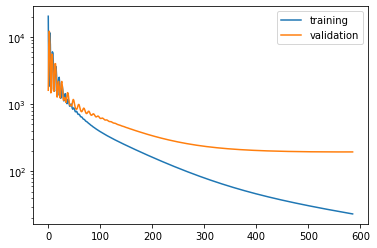

In [26]:
plt.figure()
plt.plot(hist.history['loss'], label='training')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend()
plt.yscale('log')
plt.show()

### Tensorflow-Keras

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(100,)))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 29,569
Trainable params: 29,569
Non-trainable params: 0
_________________________________________________________________
